# Lab 8
Keith Gompf

# Part 1 - Developing The Model

In [212]:
#@title
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


mpgdata = sns.load_dataset("mpg")
#needed to clean dataset
mpgdata.dropna(inplace=True)
mpgdata

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [213]:
X = mpgdata[["cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year",]]
Y = mpgdata["mpg"]

# 67 test sets
X_train1, X_test, y_train1, y_test = train_test_split(X, Y, test_size=.17, random_state=42)

#75 validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train1, y_train1, test_size=.25, random_state=46)

In [214]:
#@title
#linear regression model on the training set
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [215]:
#@title

# make data pipeline for Partial Least Squares Regression
pipe = pipe = Pipeline(steps=[ ('preprocess', StandardScaler()),('model', LinearRegression()) ])
# apply scaling on training data
pipe.fit(X_train, y_train)

# predict values
y_pred_v = pipe.predict(X_valid)
y_pred = pipe.predict(X_test)

# validation metric
r2 = r2_score(y_valid, y_pred_v)
print("Accuracy is ")
print(r2_score(y_valid, y_pred_v))

#results is a dataframe with actual and what is predicted
results = pd.DataFrame({'actual': y_valid, 'predicted': y_pred_v})
results

Accuracy is 
0.8242472282314822


,actual,predicted
68,13.0,9.552667
310,38.1,33.907846
231,15.5,14.928261
190,14.5,14.690916
285,17.0,19.893635
...,...,...
5,15.0,9.207664
334,23.7,29.957442
172,25.0,27.920511
294,34.1,32.665210


I think this model is quite good, most predicted values are off, however they are mostly off by 1-3 mpg, which isnt a bad average. There is a couple that are 5+ off however there are few.

# PART 2 - Validation and Interpretation

In [216]:
results["residuals"] = results["actual"]-results["predicted"]
results

,actual,predicted,residuals
68,13.0,9.552667,3.447333
310,38.1,33.907846,4.192154
231,15.5,14.928261,0.571739
190,14.5,14.690916,-0.190916
285,17.0,19.893635,-2.893635
...,...,...,...
5,15.0,9.207664,5.792336
334,23.7,29.957442,-6.257442
172,25.0,27.920511,-2.920511
294,34.1,32.665210,1.434790


In [217]:
results["residuals"].sum() 

-3.80392954937172

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='residuals'>

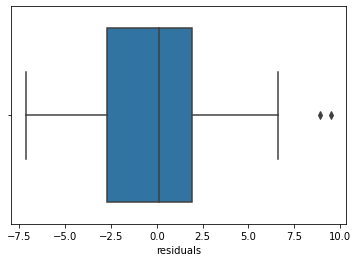

In [218]:
sns.boxplot(results["residuals"])

This shows the mean is at 0 which we want and the quartiles are all within -2 and 2 there are some outliers

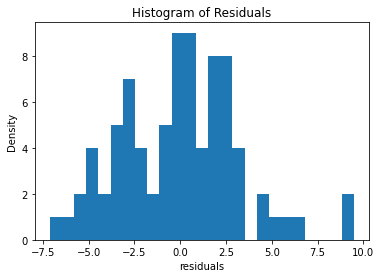

In [219]:
#@title
plt.hist(results['residuals'], bins=25)
plt.xlabel('residuals')
plt.ylabel('Density')
plt.title('Histogram of Residuals')
plt.show()

This histogram is good becuae it resembles a Gaussian around 0 which is what we are aiming for.

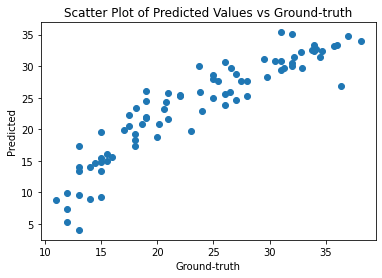

In [220]:
#@title
plt.scatter(results["actual"], results['predicted'])
plt.xlabel('Ground-truth')
plt.ylabel('Predicted')
plt.title('Scatter Plot of Predicted Values vs Ground-truth')
plt.show()

This shows a nice leaner relation between the predicted values and the actual values, there are some that are too low or too high but they stand out easily

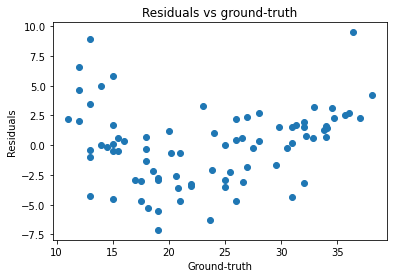

In [221]:
#@title
plt.scatter(results["actual"], results["residuals"])
plt.xlabel('Ground-truth')
plt.ylabel("Residuals")
plt.title('Residuals vs ground-truth')
plt.show()

We do not see a clear pattern, there is too much scattering of the points and outliers to label this as anything which is good.